In [1]:

!pip install -I numpy==1.19.2
!pip install snowflake-connector-python
import warnings
warnings.filterwarnings("ignore")
!pip install -I pyarrow==5.0.0
!pip install git+https://github.com/pattersonconsulting/ml_tools.git

     |████████████████████████████████| 14.5 MB 10.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 14.9 MB 12.4 MB/s 
     |████████████████████████████████| 104 kB 73.7 MB/s 
     |████████████████████████████████| 192 kB 85.6 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 1.9 MB 66.5 MB/s 
     |████████████████████████████████| 3.0 MB 16.3 MB/s 
     |████████████████████████████████| 23.6 MB 1.2 MB/s 
     |████████████████████████████████| 15.7 MB 48.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Cloning https://github.com/pattersonconsulting/ml_tools.git to /tmp/pip-req-build-pxdcfi1a
  Running command git clone -q https://github.com/pattersonconsulting/ml_tools.git /tmp/pip-req-build-pxdcfi1a
  Created wheel for ml-valuation: filename=ml_valuation-0.0.1-py3-none-any.whl size=8800 sha256=206661f3f75698901c0c074a57ff1b75fa5768e41e87d9ec538fe360c980cb6a
  Stored in directory: /tmp/pip-ephem-wheel-cache-y8az2rma/wheels/ce/52/e8/5f5de6a3a97eca5d2f9e453ecafb0f88f99054a1f2601f637e
Successfully built ml-valuation


In [2]:
# import basic data science libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

In [3]:
import sklearn_pandas
from sklearn_pandas import DataFrameMapper, cross_val_score

In [4]:

# import required machine learning libraries

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix


import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.preprocessing import Normalizer, StandardScaler

!pip install scikit-plot
import scikitplot as skplt

# classifiers
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import ml_valuation

from ml_valuation import model_valuation
from ml_valuation import model_visualization

In [ ]:
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv")
#print( df.head() )

#print( df.info() )
import snowflake.connector
import getpass

# using a simpler way to use your login info without embedding it in the notebook 
# other enterprise connection patterns (e.g., SSO) are in the Snowflake docs: https://docs.snowflake.com/en/user-guide/python-connector-example.html
snowflake_username = getpass.getpass("Enter Snowflake Username")
snowflake_pwd = getpass.getpass("Enter Snowflake Password")
snowflake_acct = 'nna57244.us-east-1'

print(snowflake_username)
print(snowflake_acct)


In [6]:

ctx = snowflake.connector.connect(
  user=snowflake_username,
  password=snowflake_pwd,
  account=snowflake_acct
  )
cs = ctx.cursor()
try:
	cs.execute("SELECT current_version()")
	one_row = cs.fetchone()
	print(one_row[0])



	#cs.cursor().execute("USE WAREHOUSE tiny_warehouse_mg")
	cs.execute("USE DATABASE PREDICTIVE_MAINTENANCE")    


	#cs.execute("SELECT count(TYPE) from RAW_DEVICE_DATA where MACHINE_FAILURE = 1;")
	#one_row = cs.fetchone()
	#print("Records with Failures: " + str(one_row[0]))

	query_output = cs.execute( "select TYPE, AIR_TEMPERATURE, PROCESS_TEMPERATURE, ROTATIONAL_SPEED, TORQUE, TOOL_WEAR, MACHINE_FAILURE  from SUMMARY_SENSOR_DATA;" )

	df = query_output.fetch_pandas_all() #.to_csv("/path/to/write/table.csv")	
	#df.to_csv("./data/full_snowflake_dataset.csv", index=False)	

	print( df )


finally:
    cs.close()



ctx.close()

5.41.1
     TYPE  AIR_TEMPERATURE  ...  TOOL_WEAR  MACHINE_FAILURE
0       M            298.1  ...        0.0                0
1       L            298.2  ...        3.0                0
2       L            298.1  ...        5.0                0
3       L            298.2  ...        7.0                0
4       L            298.2  ...        9.0                0
...   ...              ...  ...        ...              ...
5245    M            298.8  ...       14.0                0
5246    H            298.9  ...       17.0                0
5247    M            299.0  ...       22.0                0
5248    H            299.0  ...       25.0                0
5249    M            299.0  ...       30.0                0

[10000 rows x 7 columns]


In [7]:
# map categorical variable 'diagnosis' into numeric

df["TYPE"] = df["TYPE"].map({'H': 2, 'M': 1, 'L': 0})

df.head()



,TYPE,AIR_TEMPERATURE,PROCESS_TEMPERATURE,ROTATIONAL_SPEED,TORQUE,TOOL_WEAR,MACHINE_FAILURE
0,1,298.1,308.6,1551.0,42.8,0.0,0
1,0,298.2,308.7,1408.0,46.3,3.0,0
2,0,298.1,308.5,1498.0,49.4,5.0,0
3,0,298.2,308.6,1433.0,39.5,7.0,0
4,0,298.2,308.7,1408.0,40.0,9.0,0


In [8]:
df['MACHINE_FAILURE'].value_counts(normalize=True) * 100


0    96.61
1     3.39
Name: MACHINE_FAILURE, dtype: float64

In [9]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

df_full = df.copy()

y_train_full = df_full.pop("MACHINE_FAILURE")

y_train_full = pd.DataFrame(y_train_full)

column_types = { "TYPE": "categorical", "AIR_TEMPERATURE" : "numerical", "PROCESS_TEMPERATURE" : "numerical", "ROTATIONAL_SPEED" : "numerical", "TORQUE" : "numerical", "TOOL_WEAR" : "numerical" }
numerical_cols = [
  'AIR_TEMPERATURE', 'PROCESS_TEMPERATURE', 'ROTATIONAL_SPEED', 'TORQUE', 'TOOL_WEAR'
]
categorical_cols = [
  'TYPE'
]

x_train_mapper = DataFrameMapper([
  ('TYPE', sklearn.preprocessing.LabelBinarizer()),
  (['AIR_TEMPERATURE'], sklearn.preprocessing.StandardScaler()),
  (['PROCESS_TEMPERATURE'], sklearn.preprocessing.StandardScaler()),
  (['ROTATIONAL_SPEED'], sklearn.preprocessing.StandardScaler()),
  (['TORQUE'], sklearn.preprocessing.StandardScaler()),
  (['TOOL_WEAR'], sklearn.preprocessing.StandardScaler())
  ], df_out=True)

df_full_scaled = x_train_mapper.fit_transform(df_full.copy())

x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(df_full_scaled, y_train_full, test_size=1 - train_ratio)

#x_val_scaled, x_test_scaled, y_val_scaled, y_test_scaled = train_test_split(x_test_scaled, y_test_scaled, test_size=test_ratio/(test_ratio + validation_ratio)) 


# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
#x_train, x_test, y_train, y_test = train_test_split(df_full, y_train_full, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print("original dataset ")
print(df_full.head())

print("df_full_scaled dataset ")
print(df_full_scaled.head())

#print("x_train dataset ")
#print(x_train.head())

print("x_train_scaled:")
print(x_train_scaled.head())

#print(x_train, x_val, x_test)

#print(y_train, y_val, y_test)

original dataset 
   TYPE  AIR_TEMPERATURE  ...  TORQUE  TOOL_WEAR
0     1            298.1  ...    42.8        0.0
1     0            298.2  ...    46.3        3.0
2     0            298.1  ...    49.4        5.0
3     0            298.2  ...    39.5        7.0
4     0            298.2  ...    40.0        9.0

[5 rows x 6 columns]
df_full_scaled dataset 
   TYPE_0  TYPE_1  TYPE_2  ...  ROTATIONAL_SPEED    TORQUE  TOOL_WEAR
0       0       1       0  ...          0.068185  0.282200  -1.695984
1       1       0       0  ...         -0.729472  0.633308  -1.648852
2       1       0       0  ...         -0.227450  0.944290  -1.617430
3       1       0       0  ...         -0.590021 -0.048845  -1.586009
4       1       0       0  ...         -0.729472  0.001313  -1.554588

[5 rows x 8 columns]
x_train_scaled:
      TYPE_0  TYPE_1  TYPE_2  ...  ROTATIONAL_SPEED    TORQUE  TOOL_WEAR
268        0       1       0  ...          0.453068 -0.339763  -0.439129
1249       1       0       0  ...     

Let's make a Dummy Classifier that always chooses the Majority Class to baseline against

In [10]:
def calculate_cv_standard_error_ci(cv, model, X, y, k, top_N_predictions):

  stats = list()

  for i, (train_index, test_index) in enumerate(cv.split(X, y)):

    # convert the data indexes into references
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

    print("Running CV Fold-" + str(i))

    # fit the model on the training data (Xtrain) and labels (ytrain)
    model.fit( Xtrain, ytrain.values.ravel() )

    # now get the probabilites of the predictions for the text input (data: Xtest, labels: ytest)
    probas_ = model.predict_proba( Xtest )
    prediction_est_prob = probas_[:, 1]

    scmtrx_lr_full_testset = model_valuation.standard_confusion_matrix_for_n_ranked_instances(ytest, prediction_est_prob, 0.1, top_N_predictions)

    [[tp, fp], [fn, tn]] = scmtrx_lr_full_testset

    total_predictions = (tp + tn + fp + fn)

    acc_top_N_predictions = (tp + tn) / (tp + tn + fp + fn)

    stats.append(acc_top_N_predictions)
    
    '''    
    print("Logistic Regression (full test set): ")
    print("total_predictions: " + str(total_predictions))
    print("TP: " + str(tp))
    print("TN: " + str(tn))
    print("FP: " + str(fp))
    print("FN: " + str(fn))
    '''

  mean_score = np.mean(stats)
  std_dev_score = np.std(stats)
  standard_error_score = (1/np.sqrt(k)) * std_dev_score

  # https://en.wikipedia.org/wiki/Standard_error#:~:text=Assumptions%20and%20usage%5Bedit%5D
  # https://en.wikipedia.org/wiki/1.96
  # 95% of values will lie within ±1.96
  ci_95 = 1.96 * standard_error_score
  #print("CI Ranges 95%:")

  low_end_range = mean_score - ci_95
  high_end_range = mean_score + ci_95

  return mean_score, std_dev_score, standard_error_score, ci_95, low_end_range, high_end_range


In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV, StratifiedKFold


k = 10
cv = StratifiedKFold( n_splits=k )

top_N_accuracy = 18

min_topN_accuracy = 0.61
target_topN_accuracy = 0.78

X = df_full_scaled
y = y_train_full


so notice we have high accuracy with this model? its because it always predicts the majority class (no failure), but never captures a TP

This is a great example of how accuracy in some contexts can be misleading.

Now let's move on and try a better baseline model with Logistic Regression.

In [12]:
dummy_model = DummyClassifier(strategy='most_frequent',random_state=0)


# test method for cv-se-ci
mean_score2, std_dev_score2, standard_error_score2, ci_95_2, low_end_range2, high_end_range2 = calculate_cv_standard_error_ci(cv, dummy_model, X, y, k, top_N_accuracy)

print("\n\navg top 18 acc: " + str("{:.4f}".format(mean_score2)))
print("\n\nSTD DEV: " + str(std_dev_score2))
print("\n\nStandard Error (Accuracy) Across All Folds: ( " + str("{:.4f}".format(standard_error_score2)) + ")")

Running CV Fold-0
Running CV Fold-1
Running CV Fold-2
Running CV Fold-3
Running CV Fold-4
Running CV Fold-5
Running CV Fold-6
Running CV Fold-7
Running CV Fold-8
Running CV Fold-9


avg top 18 acc: 0.9444


STD DEV: 0.07856742013183862


Standard Error (Accuracy) Across All Folds: ( 0.0248)


In [13]:
classifier_kfold_LR = LogisticRegression(solver='lbfgs')

# test method for cv-se-ci
mean_score_lr, std_dev_score_lr, standard_error_score_lr, ci_95_lr, low_end_range_lr, high_end_range_lr = calculate_cv_standard_error_ci(cv, classifier_kfold_LR, X, y, k, top_N_accuracy)

print("\n\navg top " + str(top_N_accuracy) + " acc: " + str("{:.4f}".format(mean_score_lr)))
print("\n\nSTD DEV: " + str(std_dev_score_lr))
print("\n\nStandard Error (Accuracy) Across All Folds: ( " + str("{:.4f}".format(standard_error_score_lr)) + ")")
print("High: " + str(high_end_range_lr))
print("Low : " + str(low_end_range_lr))


Running CV Fold-0
Running CV Fold-1
Running CV Fold-2
Running CV Fold-3
Running CV Fold-4
Running CV Fold-5
Running CV Fold-6
Running CV Fold-7
Running CV Fold-8
Running CV Fold-9


avg top 18 acc: 0.6667


STD DEV: 0.20637972912229677


Standard Error (Accuracy) Across All Folds: ( 0.0653)
High: 0.7945821480220148
Low : 0.5387511853113187


So we're looking for a minumum 61% consistently as our top-18 prediction accuracy goal.

Unfortunately, our next baseline didnt quite meet that metric as we can see that while the model's mean top-18 accuracy is 67% correct, but the 95% CI low end can be as low as 53.8% (bad). We need a model that will perform above 61% at least 95% of the time, so our low-end CI needs to clear our target score.

Imbalanced data problems can be tough as shown with scores with this wide of variance.

At this point we know we're going to have to put a little more effort into modeling to get closer to our minimum pilot goal, so let's look at doing some light grid search across a few different model architectures that have been known to perform well.

So far we haven't plotted a model evaluation graph (because there was nothing to compare).

To show relative model performance towards classifying the rare class we're use a Precision Recall Curve.

Once we identify the most promising top 3 models, we'll evaluate their performance with our top-18 prediction test to see which ones can survive a 95% confidence interval.


Running Grid Search for: Logistic Regression
Best [Training] AP (Mean cross-validated) score: 0.461
[Training] Cross Validation AP (Mean) Logistic Regression AP: 0.461 SD: 0.117
[[  14    2]
 [  70 2414]]
Model execution time: 0.761327

Running Grid Search for: Random Forest Classifiers
Best [Training] AP (Mean cross-validated) score: 0.779
[Training] Cross Validation AP (Mean) Random Forest Classifiers AP: 0.779 SD: 0.092
[[  49    9]
 [  35 2407]]
Model execution time: 10.155729

Running Grid Search for: Gradient Boosting Decision Trees
Best [Training] AP (Mean cross-validated) score: 0.800
[Training] Cross Validation AP (Mean) Gradient Boosting Decision Trees AP: 0.800 SD: 0.095
[[  58    8]
 [  26 2408]]
Model execution time: 13.897241

Running Grid Search for: XGBoost
Best [Training] AP (Mean cross-validated) score: 0.839
[Training] Cross Validation AP (Mean) XGBoost AP: 0.839 SD: 0.077
[[  61    7]
 [  23 2409]]
Model execution time: 13.311851

Running Grid Search for: LGBMClass

<Figure size 432x288 with 0 Axes>

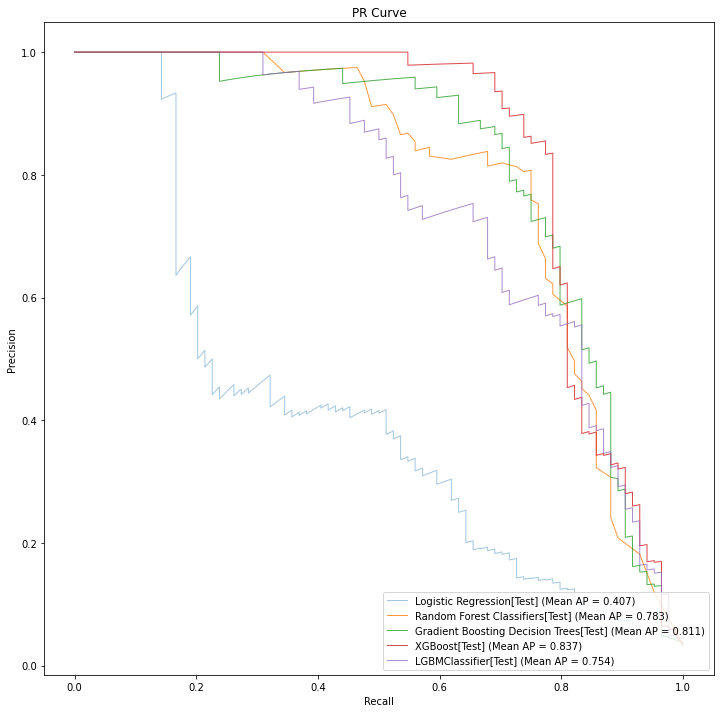

In [14]:
import datetime

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid'], 'gamma':['auto']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100], 'solver':['liblinear']}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
RF_params = {'n_estimators':[10,50,100], 'random_state':[42]}
GBC_params = {'n_estimators':[10, 50, 100], 'random_state':[42]}

"""
XGB_params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
"""
XGB_params = {
    'max_depth': range (2, 10, 4),
    'n_estimators': range(60, 220, 80),
    'learning_rate': [0.1] #, 0.01]
}

xgb_estimator = XGBClassifier(
    kvargs={'tree_method':'gpu_hist', 'gpu_id':'0'},
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

# LightGBM

params_lightGBM_ctor = {
    'application': 'binary', # for binary classification
#     'num_class' : 1, # used for multi-classes
    'boosting': 'gbdt', # traditional gradient boosting decision tree
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', # you can use GPU to achieve faster learning
    'max_depth': -1, # <0 means no limit
    'max_bin': 510, # Small number of bins may reduce training accuracy but can deal with over-fitting
    'lambda_l1': 5, # L1 regularization
    'lambda_l2': 10, # L2 regularization
    'metric' : 'binary_error',
    'subsample_for_bin': 200, # number of samples for constructing bins
    'subsample': 1, # subsample ratio of the training instance
    'colsample_bytree': 0.8, # subsample ratio of columns when constructing the tree
    'min_split_gain': 0.5, # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': 1, # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': 5# minimum number of data needed in a leaf
}

# Initiate classifier to use
lightGBM_mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          #max_depth = params_lightGBM_ctor['max_depth'],
          max_bin = params_lightGBM_ctor['max_bin'], 
          subsample_for_bin = params_lightGBM_ctor['subsample_for_bin'],
          subsample = params_lightGBM_ctor['subsample'], 
          min_split_gain = params_lightGBM_ctor['min_split_gain'], 
          min_child_weight = params_lightGBM_ctor['min_child_weight'], 
          min_child_samples = params_lightGBM_ctor['min_child_samples'])

lgbm_gs_params = {
    'max_depth': range (2, 10, 4)
    #'n_estimators': range(60, 220, 80),
    #'learning_rate': [0.1] #, 0.01]
}

models_opt = []

models_opt.append(('Logistic Regression', LogisticRegression(), LR_params))
#models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('Random Forest Classifiers', RandomForestClassifier(), RF_params))
#models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('Gradient Boosting Decision Trees', GradientBoostingClassifier(), GBC_params))

# commented out for now, takes too long during testing!
models_opt.append(('XGBoost', xgb_estimator, XGB_params))

models_opt.append(('LGBMClassifier', lightGBM_mdl, lgbm_gs_params))


# now set up Cross Validation parameters

results = []
names = []
best_models = []
best_params = {}
#k = 10

#model_data_tuples = []

plt.figure(1)
fig_pr, ax_pr = plt.subplots(1,1,figsize = (12,12))


# now let's run Grid Search for each model listed in model_opts
for name, model, params in models_opt:

    start_time = datetime.datetime.now()

    print("\nRunning Grid Search for: " + name)
    model_grid = GridSearchCV(model, params, cv=cv, scoring='average_precision') # 
    model_grid.fit(x_train_scaled, y_train_scaled)

    best_model_best_mean_score = model_grid.best_score_
    best_model_best_score_stdev = model_grid.cv_results_['std_test_score'][model_grid.best_index_]

    #print(model_grid.cv_results_.keys())

    print( 'Best [Training] AP (Mean cross-validated) score: %0.3f' % model_grid.best_score_)

    msg = "[Training] Cross Validation AP (Mean) {} AP: {:.3f} SD: {:.3f}".format(name, best_model_best_mean_score, best_model_best_score_stdev)
    print(msg)

    names.append(name)
    #print(name)

    # now let's use the test data

    predictions = model_grid.best_estimator_.predict(x_test_scaled)

    proba = model_grid.best_estimator_.predict_proba(x_test_scaled)

    #model_data_tuples.append(tuple((y_test_scaled, proba[:, 1], name)))     

    precision, recall, _ = precision_recall_curve(y_test_scaled, proba[:, 1])

    ap_test_for_model = average_precision_score(y_test_scaled, proba[:, 1])

    # Plotting each individual PR Curve
    plt.plot(recall, precision, lw=1, alpha=ap_test_for_model, label='' + name + '[Test] (Mean AP = %0.3f)' % ( ap_test_for_model ) )


    cm = model_valuation.standard_confusion_matrix(y_test_scaled, predictions)    

    print(cm)
    # 'predictions': predictions,
    best_models.append( { 'name': name, 'model_grid': model_grid, 'best_model_test_mean_ap': ap_test_for_model } )
    #best_params[ name ] = model_grid.best_params_

    end_time = datetime.datetime.now()

    time_diff = (end_time - start_time)
    print("Model execution time: " + str(time_diff.total_seconds() ) )


#plot_precision_recall_curve(model_grid.best_estimator_, X_test_norm, y_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("PR Curve")
plt.legend(loc="lower right")
plt.show()


 

At this point we can see that 3 models standout
* XGBoost
* Gradient Boosting Decision Trees
* Random Forests

We know that the Precision-Recall curve shows us which classifiers are better picking up on the rare class (e.g., imbalanced datasets)

Now let's take these top 3 models, and compare their cross-validation Standard Error confidence intervals to see which model is going to hold up "enough of the time" to meet our minimum viable performance criteria set forth by the line of business.

XGBoost: 0.836809956740349
Running CV Fold-0
Running CV Fold-1
Running CV Fold-2
Running CV Fold-3
Running CV Fold-4
Running CV Fold-5
Running CV Fold-6
Running CV Fold-7
Running CV Fold-8
Running CV Fold-9


avg top 18 acc: 0.8889


STD DEV: 0.09622504486493763


Standard Error (Accuracy) Across All Folds: ( 0.0304)
High: 0.948529789595007
Low : 0.8292479881827709
-----

Gradient Boosting Decision Trees: 0.8105641840791915
Running CV Fold-0
Running CV Fold-1
Running CV Fold-2
Running CV Fold-3
Running CV Fold-4
Running CV Fold-5
Running CV Fold-6
Running CV Fold-7
Running CV Fold-8
Running CV Fold-9


avg top 18 acc: 0.8056


STD DEV: 0.15957118462605632


Standard Error (Accuracy) Across All Folds: ( 0.0505)
High: 0.9044588004560737
Low : 0.7066523106550376
-----

Random Forest Classifiers: 0.7830730925169579
Running CV Fold-0
Running CV Fold-1
Running CV Fold-2
Running CV Fold-3
Running CV Fold-4
Running CV Fold-5
Running CV Fold-6
Running CV Fold-7
Running CV Fold-8
Running CV Fold

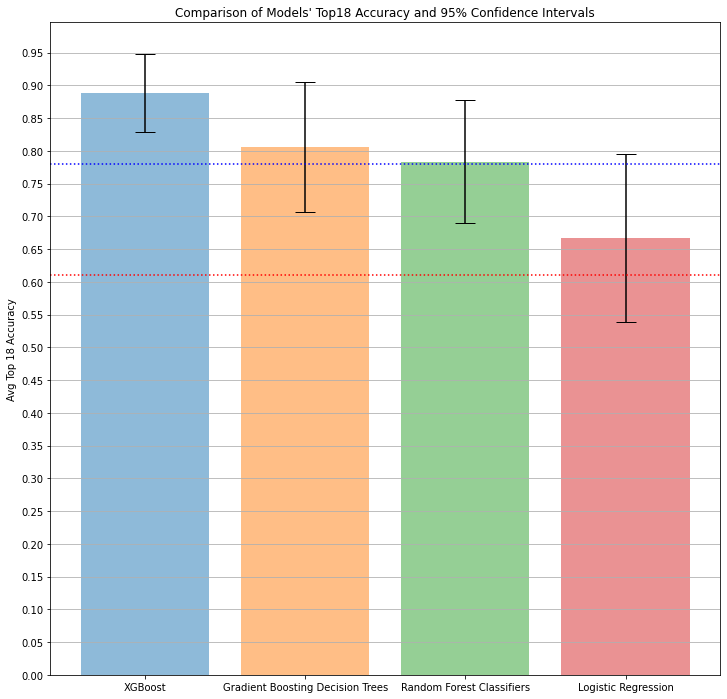

In [15]:
# for each of the top-3 models surfaced via grid search

#model_labels = np.zeros(3)
#model_scores = np.zeros(3)


fig, ax = plt.subplots(1,1,figsize = (12,12))
labels = []


# get top 3 based on mean CV AP score:
top_3_model_keys = sorted(best_models, key=lambda rec:rec['best_model_test_mean_ap'], reverse=True)[:3]

for model_index in range(3):
  print( top_3_model_keys[ model_index ]['name'] + ': ' + str(top_3_model_keys[ model_index]['best_model_test_mean_ap']) )

  labels.append(top_3_model_keys[ model_index ]['name'])

  # get best model
  model_grid = top_3_model_keys[ model_index ]['model_grid']
  best_model_best_score_stdev = model_grid.cv_results_['std_test_score'][model_grid.best_index_]
  best_model_best_mean_score = model_grid.best_score_
  #print("STD DEV: " + str(best_model_best_score_stdev) )


  # NOW: we know our AP for each model
  # what we want is the accuracy on the Top-18 predictions and the error variance
  # now we re-run CV(k=10) and re-compute the score but now for Top-18-accuracy
  # we collect the variances to compute CV-SE-CIs per model

  mean_score2, std_dev_score2, standard_error_score2, ci_95_2, low_end_range2, high_end_range2 = calculate_cv_standard_error_ci( cv, model_grid.best_estimator_, X, y, k, top_N_accuracy )

  print("\n\navg top " + str(top_N_accuracy) + " acc: " + str("{:.4f}".format(mean_score2)))
  print("\n\nSTD DEV: " + str(std_dev_score2))
  print("\n\nStandard Error (Accuracy) Across All Folds: ( " + str("{:.4f}".format(standard_error_score2)) + ")")
  print("High: " + str(high_end_range2))
  print("Low : " + str(low_end_range2))  

  ax.bar(model_index, mean_score2,
        yerr=ci_95_2,
        align='center',
        alpha=0.5,
        ecolor='black',
        capsize=10)
  
  print("-----\n")


# add logistic regression for comparison
# mean_score_lr, std_dev_score_lr, standard_error_score_lr, ci_95_lr, low_end_range_lr, high_end_range_lr
labels.append("Logistic Regression")

ax.bar(3, mean_score_lr,
      yerr=ci_95_lr,
      align='center',
      alpha=0.5,
      ecolor='black',
      capsize=10)

# draw min line
ax.axhline(min_topN_accuracy, 0, 1, linestyle = ':', color = 'r',label = 'Minimum Top18 Accuracy')

# draw target line
ax.axhline(target_topN_accuracy, 0, 1, linestyle = ':', color = 'b',label = 'Minimum Top18 Accuracy')


x_pos = np.arange(len(labels))
ax.set_ylabel('Avg Top 18 Accuracy')
ax.set_yticks(np.arange(0, 1.0, 0.05))
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Comparison of Models\' Top18 Accuracy and 95% Confidence Intervals')
ax.yaxis.grid(True)

# Save the figure and show
#plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()

  


# based on the variances from the top-20-ranked-predictions, calculate the CV-SE-CI (Standard Error Confidence Intervals at 95%)

In [ ]:
top_1_model_keys = sorted(best_models, key=lambda rec:rec['best_model_test_mean_ap'], reverse=True)[:1]

#top_model_key = top_1_model_keys[0]

print( top_1_model_keys[ 0 ]['name'] + ': ' + str(top_1_model_keys[ 0 ]['best_model_test_mean_ap']) )


# get best model
model_grid = top_1_model_keys[ 0 ]['model_grid']
best_model_best_score_stdev = model_grid.cv_results_['std_test_score'][model_grid.best_index_]
best_model_best_mean_score = model_grid.best_score_

best_estimator = model_grid.best_estimator_

print(best_estimator)

predictions_final = best_estimator.predict(x_test_scaled)

print( predictions_final )


XGBoost: 0.8993044875085507
XGBClassifier(kvargs={'gpu_id': '0', 'tree_method': 'gpu_hist'}, max_depth=6,
              n_estimators=60, nthread=4, seed=42)
[0 0 0 ... 1 0 0]


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive



Mounted at /gdrive
/gdrive


In [ ]:

%ls -la "./MyDrive/machine_learning/predictive_maintenance/models/"

total 0


In [ ]:
!pip install sklearn2pmml


     |████████████████████████████████| 6.0 MB 28.0 MB/s 
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.76.1-py3-none-any.whl size=5985321 sha256=2f2ddc4223f4152af2db6cfbf9b04059e58c7985b06ed7d366d414729c293d8a
  Stored in directory: /root/.cache/pip/wheels/56/e3/4a/84bc2cf69826abbd14368ed4d287d71891614891bb87fde2d4
Successfully built sklearn2pmml


In [ ]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline

'''
sklearn2pmml(estimator=best_estimator, 
             mapper=x_train_mapper, 
             pmml="./MyDrive/machine_learning/predictive_maintenance/models/pm_sklearn_gscv_xgb_20211123.pmml")
'''
pipeline = PMMLPipeline([
	("mapper", x_train_mapper),
	("classifier", best_estimator)
])

In [ ]:
sklearn2pmml(pipeline, "./MyDrive/machine_learning/predictive_maintenance/models/pm_sklearn_gscv_xgb_20211123.pmml", with_repr = True)
